# Classification metrics
Author: Geraldine Klarenberg

Based on the Google Machine Learning Crash Course

## Tresholds
In previous lessons, we have talked about using regression models to predict values. But sometimes we are interested in **classifying** things: "spam" vs "not spam", "bark" vs "not barking", etc. 

Logistic regression is a great tool to use in ML classification models. We can use the outputs from these models by defining **classification thresholds**. For instance, if our model tells us there's a probability of 0.8 that an email is spam (based on some characteristics), the model classifies it as such. If the probability estimate is less than 0.8, the model classifies it as "not spam". The threshold allows us to map a logistic regression value to a binary category (the prediction).

Tresholds are problem-dependent, so they will have to be tuned for the specific problem you are dealing with.

In this lesson we will look at metrics you can use to evaluate a classification model's predictions, and what changing the threshold does to your model and predictions.

## True, false, positive, negative...

Now, we could simply look at "accuracy": the ratio of all correct predictions to all predictions. This is simple, intuitive and straightfoward. 

But there are some problems with this approach:
* This approach does not work well if there is (class) imbalance; situations where certain negative or positive values or outcomes are rare; 
* and, most importantly: different kind of mistakes can have different costs...

### The boy who cried wolf...

We all know the story!

![Illustration of the boy who cried wolf](../nb-images/wolfpic.jpg)

For this example, we define "there actually is a wolf" as a positive class, and "there is no wolf" as a negative class. The predictions that a model makes can be true or false for both classes, generating 4 outcomes:

![An table showing a confusion matrix based on the story of the boy who cried wolf](../nb-images/confusionmatrix_wolf.png)

This table is also called a *confusion matrix*.

There are 2 metrics we can derive from these outcomes: precision and recall.

## Precision
Precision asks the question what proportion of the positive predictions was actually correct?

To calculate the precision of your model, take all true positives divided by *all* positive predictions:
$$\text{Precision} = \frac{TP}{TP+FP}$$

Basically: **did the model cry 'wolf' too often or too little?**

**NB** If your model produces no negative positives, the value of the precision is 1.0. Too many negative positives gives values greater than 1, too few gives values less than 1.

### Exercise
Calculate the precision of a model with the following outcomes

true positives (TP): 1 | false positives (FP): 1 
-------|--------
**false negatives (FN): 8** | **true negatives (TN): 90** 

## Recall
Recall tries to answer the question what proportion of actual positives was answered correctly?

To calculate recall, divide all true positives by the true positives plus the false negatives:
$$\text{Recall} = \frac{TP}{TP+FN}$$

Basically: **how many wolves that tried to get into the village did the model actually get?**

**NB** If the model produces no false negative, recall equals 1.0

### Exercise
For the same confusion matrix as above, calculate the recall.

## Balancing precision and recall
To evaluate your model, should look at **both** precision and recall. They are often in tension though: improving one reduces the other.
Lowering the classification treshold improves recall (your model will call wolf at every little sound it hears) but will negatively affect precision (it will call wolf too often).

### Exercise
#### Part 1
Look at the outputs of a model that classifies incoming emails as "spam" or "not spam".

![Image of outcomes of a spam/not spam classification model](../nb-images/PrecisionVsRecallBase.svg)

The confusion matrix looks as follows

true positives (TP): 8 | false positives (FP): 2 
-------|--------
**false negatives (FN): 3** | **true negatives (TN): 17** 

Calculate the precision and recall for this model.

#### Part 2
Now see what happens to the outcomes (below) if we increase the threshold

![Image of outcomes of a spam/not spam classification model](../nb-images/PrecisionVsRecallRaiseThreshold.svg)

The confusion matrix looks as follows

true positives (TP): 7 | false positives (FP): 4 
-------|--------
**false negatives (FN): 1** | **true negatives (TN): 18** 

Calculate the precision and recall again.

**Compare the precision and recall from the first and second model. What do you notice?** 

## Evaluate model performance
We can evaluate the performance of a classification model at all classification thresholds. For all different thresholds, calculate the *true positive rate* and the *false positive rate*. The true positive rate is synonymous with recall (and sometimes called *sensitivity*) and is thus calculated as

$ TPR = \frac{TP} {TP + FN} $

False positive rate (sometimes called *specificity*) is:

$ FPR = \frac{FP} {FP + TN} $

When you plot the pairs of TPR and FPR for all the different thresholds, you get a Receiver Operating Characteristics (ROC) curve. Below is a typical ROC curve.

![Image of an ROC curve](../nb-images/ROCCurve.svg)

To evaluate the model, we look at the area under the curve (AUC). The AUC has a probabilistic interpretation: it represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example.

![Image with predictions ranked according to logistic regression score](../nb-images/AUCPredictionsRanked.svg)

So if that AUC is 0.9, that's the probability the pair-wise prediction is correct. Below are a few visualizations of AUC results. On top are the distributions of the outcomes of the negative and positive outcomes at various thresholds. Below is the corresponding ROC.

![Image with distributions of positive and negative classes - perfect](../nb-images/TowardsDataScienceAUC_perfect.png) 
![Image with AUC - perfect](../nb-images/TowardsDataScienceAUC_perfect2.png)
**This AUC suggests a perfect model** (which is suspicious!)


![Image with distributions of positive and negative classes - normal](../nb-images/TowardsDataScienceAUC_normal.png)
![Image with AUC - normal](../nb-images/TowardsDataScienceAUC_normal2.png)
**This is what most AUCs look like**. In this case, AUC = 0.7 means that there is 70% chance the model will be able to distinguish between positive and negative classes.

![Image with distributions of positive and negative classes - worst](../nb-images/TowardsDataScienceAUC_worst.png)
![Image with AUC - worst](../nb-images/TowardsDataScienceAUC_worst2.png)
**This is actually the worst case scenario.** This model has no discrimination capacity at all... 

## Prediction bias
Logistic regression should be unbiased, meaning that the average of the predictions should be more or less equal to the average of the observations. **Prediction bias** is the difference between the average of the predictions and the average of the labels in a data set.

This approach is not perfect, e.g. if your model almost always predicts the average there will not be much bias. However, if there **is** bias ("significant nonzero bias"), that means there is something something going on that needs to be checked, specifically that the model is wrong about the frequency of positive labels.

Possible root causes of prediction bias are:
* Incomplete feature set
* Noisy data set
* Buggy pipeline
* Biased training sample
* Overly strong regularization

### Buckets and prediction bias
For logistic regression, this process is a bit more involved, as the labels assigned to an examples are either 0 or 1. So you cannot accurately predict the prediction bias based on one example. You need to group data in "buckets" and examine the prediction bias on that. Prediction bias for logistic regression only makes sense when grouping enough examples together to be able to compare a predicted value (for example, 0.392) to observed values (for example, 0.394). 

You can create buckets by linearly breaking up the target predictions, or create quantiles. 

The plot below is a calibration plot. Each dot represents a bucket with 1000 values. On the x-axis we have the average value of the predictions for that bucket and on the y-axis the average of the actual observations. Note that the axes are on logarithmic scales.

![Image of a calibration plot with buckets](../nb-images/BucketingBias.svg)

## Coding
Recall the logistic regression model we made in the previous lesson. That was a perfect fit, so not that useful when we look at the metrics we just discussed.

In the cloud plot with the sepal length and petal width plotted against each other, it is clear that the other two iris species are less separated. Let's use one of these as an example. We'll rework the example so we're classifying irises for being "virginica" or "not virginica". 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(X, 
                  columns = ['sepal_length(cm)',
                            'sepal_width(cm)',
                            'petal_length(cm)',
                            'petal_width(cm)'])

df['species_id'] = y

species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

df['species_name'] = df['species_id'].map(species_map)

df.head()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),species_id,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Now extract the data we need and create the necessary dataframes again.

In [ ]:
X  = np.c_[X[:,0], X[:,3]]

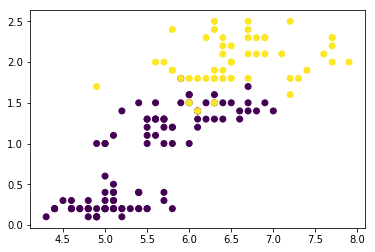

In [6]:
y = []
for i in range(len(X)):
    if i > 99:
        y.append(1)
    else:
        y.append(0)

y = np.array(y)

plt.scatter(X[:,0], X[:,1], c = y)

Create our test and train data, and run a model. The default classification threshold is 0.5. If the predicted probability is > 0.5, the predicted result is 'virgnica'. If it is < 0.5, the predicted result is 'not virginica'.

In [7]:
random = np.random.permutation(len(X))
x_train = X[random][30:]
x_test = X[random][:30]

y_train= y[random][30:]
y_test = y[random][:30]

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Instead of looking at the probabilities and the plot, like in the last lesson, let's run some classification metrics on the training dataset. 

If you use ".score", you get the mean accuracy.

In [22]:
log_reg.score(x_train, y_train)

0.95

Let's predict values and see what this ouput means and how we can look at other metrics.

In [23]:
predictions = log_reg.predict(x_train)
predictions, y_train

(array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1]))

There is a way to look at the confusion matrix. The output that is generated has the same structure as the confusion matrices we showed earlier:

true positives (TP) | false positives (FP) 
-------|--------
**false negatives (FN)** | **true negatives (TN)** 

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, predictions)

array([[81,  1],
       [ 5, 33]])

Indeed, for the accuracy calculation: we predicted 81 + 33 = 114 correct (true positives and true negatives), and 114/120 (remember, our training data had 120 points) = 0.95.

There is also a function to calculate recall and precision:

Since we also have a testing data set, let's see what the metrics look like for that.

In [27]:
from sklearn.metrics import recall_score
recall_score(y_train, predictions)

0.868421052631579

In [28]:
from sklearn.metrics import precision_score
precision_score(y_train, predictions)

0.9705882352941176

And, of course, there are also built-in functions to check the ROC curve and AUC! For these functions, the inputs are the labels of the original dataset and the predicted probabilities (- not the predicted labels -> **why?**). Remember what the two columns mean?

In [47]:
proba_virginica = log_reg.predict_proba(x_train)
proba_virginica[0:10]

array([[0.79088354, 0.20911646],
       [0.76441507, 0.23558493],
       [0.21376472, 0.78623528],
       [0.68298146, 0.31701854],
       [0.98434495, 0.01565505],
       [0.98202253, 0.01797747],
       [0.59645687, 0.40354313],
       [0.99162653, 0.00837347],
       [0.98955069, 0.01044931],
       [0.69536435, 0.30463565]])

In [48]:
from sklearn.metrics import roc_curve
fpr_model, tpr_model, thresholds_model = roc_curve(y_train, proba_virginica[:,1])

In [49]:
fpr_model

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01219512, 0.01219512,
       0.03658537, 0.04878049, 0.04878049, 0.07317073, 0.07317073,
       0.1097561 , 0.1097561 , 0.13414634, 0.15853659, 0.17073171,
       0.19512195, 0.19512195, 0.20731707, 0.24390244, 0.35365854,
       0.37804878, 0.41463415, 0.43902439, 0.57317073, 0.6097561 ,
       0.62195122, 0.64634146, 0.68292683, 0.69512195, 0.7195122 ,
       0.75609756, 0.76829268, 0.81707317, 0.84146341, 0.85365854,
       0.87804878, 0.90243902, 0.92682927, 0.96341463, 0.98780488,
       1.        ])

In [50]:
tpr_model

array([0.02631579, 0.21052632, 0.26315789, 0.42105263, 0.47368421,
       0.5       , 0.55263158, 0.63157895, 0.63157895, 0.86842105,
       0.86842105, 0.86842105, 0.89473684, 0.89473684, 0.92105263,
       0.92105263, 0.94736842, 0.94736842, 0.94736842, 0.97368421,
       0.97368421, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [51]:
thresholds_model

array([0.9543821 , 0.88400175, 0.86877788, 0.78623528, 0.76976277,
       0.75242062, 0.74626989, 0.70166775, 0.6840347 , 0.52035581,
       0.49338248, 0.47269031, 0.46453574, 0.45209154, 0.44708893,
       0.37018773, 0.35394216, 0.32247005, 0.31701854, 0.30463565,
       0.30198749, 0.29512957, 0.29252928, 0.28736925, 0.20911646,
       0.20705139, 0.1887098 , 0.18115478, 0.01842535, 0.01797747,
       0.01698478, 0.01584934, 0.01565505, 0.01497238, 0.01460719,
       0.01362849, 0.01346105, 0.0118611 , 0.01106433, 0.01044931,
       0.01032052, 0.00950749, 0.00897822, 0.0088674 , 0.00837347,
       0.00719249])

Plot the ROC curve as follows

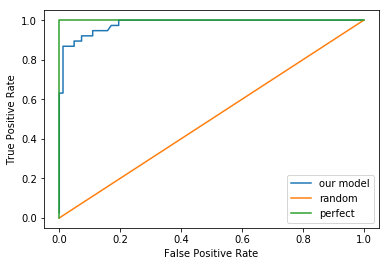

In [52]:
plt.plot(fpr_model, tpr_model,label='our model')
plt.plot([0,1],[0,1],label='random')
plt.plot([0,0,1,1],[0,1,1,1],label='perfect')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The AUC:

In [53]:
from sklearn.metrics import roc_auc_score
auc_model = roc_auc_score(y_train, proba_virginica[:,1])
auc_model

0.9815468549422336

You can use the ROC and AUC metric to evaluate competing models. Many people prefer to use these metrics to analyze each model’s performance because it does not require selecting a threshold and helps balance true positive rate and false positive rate.

Now let's do the same thing for our test data (but again, this dataset is fairly small, and K-fold cross-validation is recommended).

In [54]:
log_reg.score(x_test, y_test)

0.9333333333333333

In [55]:
predictions = log_reg.predict(x_test)
predictions, y_test

(array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 0, 1, 0, 0]))

In [56]:
confusion_matrix(y_test, predictions)

array([[17,  1],
       [ 1, 11]])

In [57]:
recall_score(y_test, predictions)

0.9166666666666666

In [59]:
precision_score(y_test, predictions)

0.9166666666666666

In [60]:
proba_virginica = log_reg.predict_proba(x_test)
fpr_model, tpr_model, thresholds_model = roc_curve(y_test, proba_virginica[:,1])

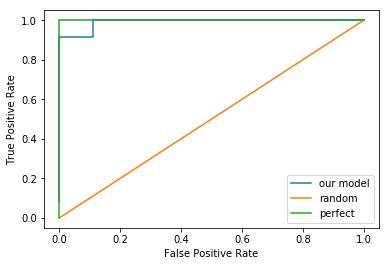

In [61]:
plt.plot(fpr_model, tpr_model,label='our model')
plt.plot([0,1],[0,1],label='random')
plt.plot([0,0,1,1],[0,1,1,1],label='perfect')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [62]:
auc_model = roc_auc_score(y_test, proba_virginica[:,1])
auc_model

0.9907407407407408

Learn more about the logistic regression function and options at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html